In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Transformed_Housing_Data2.csv")

In [3]:
data['mean_sales'] = data['Sale_Price'].mean()

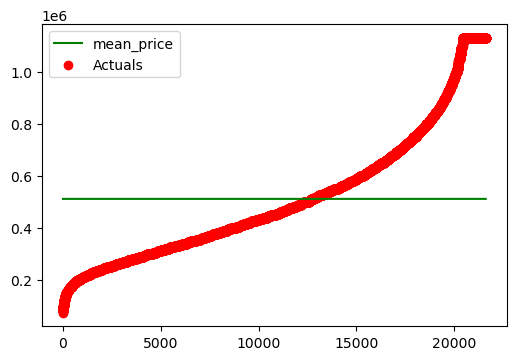

In [4]:
plt.figure(dpi = 100)
k = range(0, len(data)) #index of data at x-axis
plt.scatter(k, data['Sale_Price'].sort_values(), color = 'red', label = 'Actuals')
plt.plot(k, data['mean_sales'].sort_values(), color = 'green', label = 'mean_price')
plt.legend()

# Improving the model

In [5]:
grades_mean = data.pivot_table(values = 'Sale_Price', columns = 'Overall Grade', aggfunc = np.mean)
grades_mean

Overall Grade,1,2,3,4,5,6,7,8,9,10
Sale_Price,142000.0,1129575.0,205666.666667,214381.034483,248523.971074,301882.01472,402239.619779,537584.082097,736936.769025,960408.078866


In [11]:
# make a new column
data['grade_mean'] = 0
#for every grade, fill its mean price in new column
for i in grades_mean.columns:
    data['grade_mean'][data['Overall Grade'] == i] = grades_mean[i][0]
    
data['grade_mean'].head()
# this is grade_mean model

<ipython-input-11-126ce1a80876>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['grade_mean'][data['Overall Grade'] == i] = grades_mean[i][0]
<ipython-input-11-126ce1a80876>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['grade_mean'][data['Overall Grade'] == i] = grades_mean[i][0]


0    402239.619779
1    402239.619779
2    301882.014720
3    402239.619779
4    537584.082097
Name: grade_mean, dtype: float64

# Comparing Previous and New Model

In [12]:
gradewise_list = []
for i in range(1,11):
    k = data['Sale_Price'][data['Overall Grade'] == i]
    gradewise_list.append(k)

In [13]:
classwise_list = []
for i in range(1,11):
    k = data['Sale_Price'][data['Overall Grade'] == i]
    classwise_list.append(k)

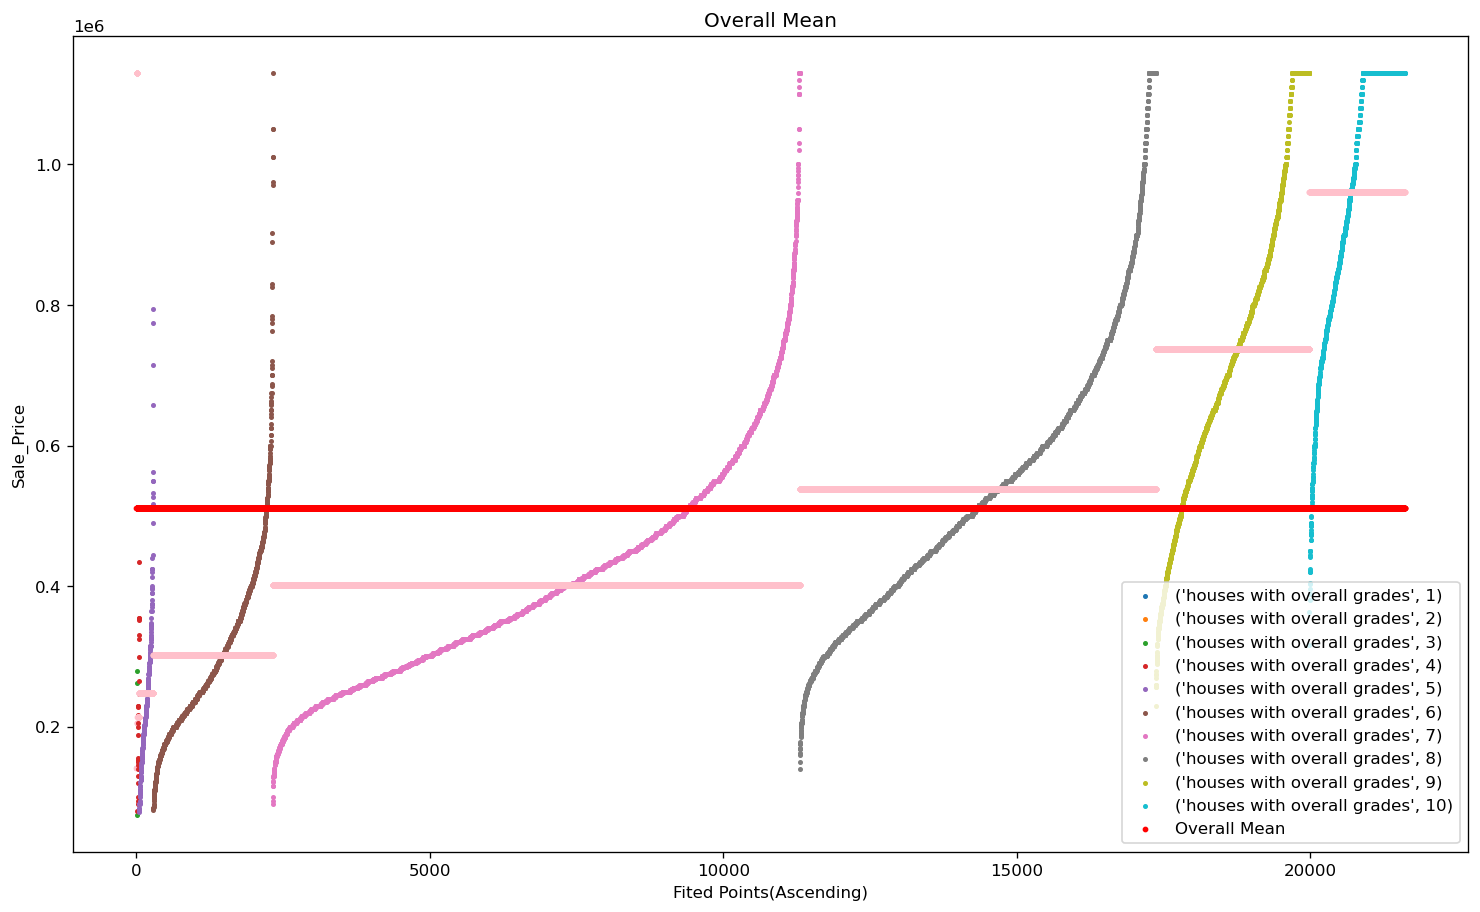

In [14]:
plt.figure(dpi = 120, figsize = (15,9))
#Plotting Sale_Price gradewise
z = 0 #z-variable is for x-axis
for i in range(1,11):
    #defining x-axis using z
    points = [k for k in range(z,z + len(classwise_list[i-1]))]
#Plotting for Overall Grade 1 and then for others
    plt.scatter(points, classwise_list[i-1].sort_values(), label = ('houses with overall grades', i), s=4)
#Plotting gradewise_mean
    plt.scatter(points, [classwise_list[i-1].mean() for q in range(len(classwise_list[i-1]))], 
                s=6, color = 'pink')
    z= max(points)+1
#Plotting Overall Mean
plt.scatter([q for q in range(0,z)],
            data['mean_sales'], 
            color = 'red',
            label = 'Overall Mean',
            s = 6)
plt.xlabel("Fited Points(Ascending)")
plt.ylabel('Sale_Price')
plt.title('Overall Mean')
#specifying the position of displaying labels at the bottom right of the plot
plt.legend(loc=4)

    

# Comparing models using Residual Plot

In [15]:
mean_difference = data['mean_sales'] - data['Sale_Price']
grade_mean_difference = data['grade_mean'] - data['Sale_Price']

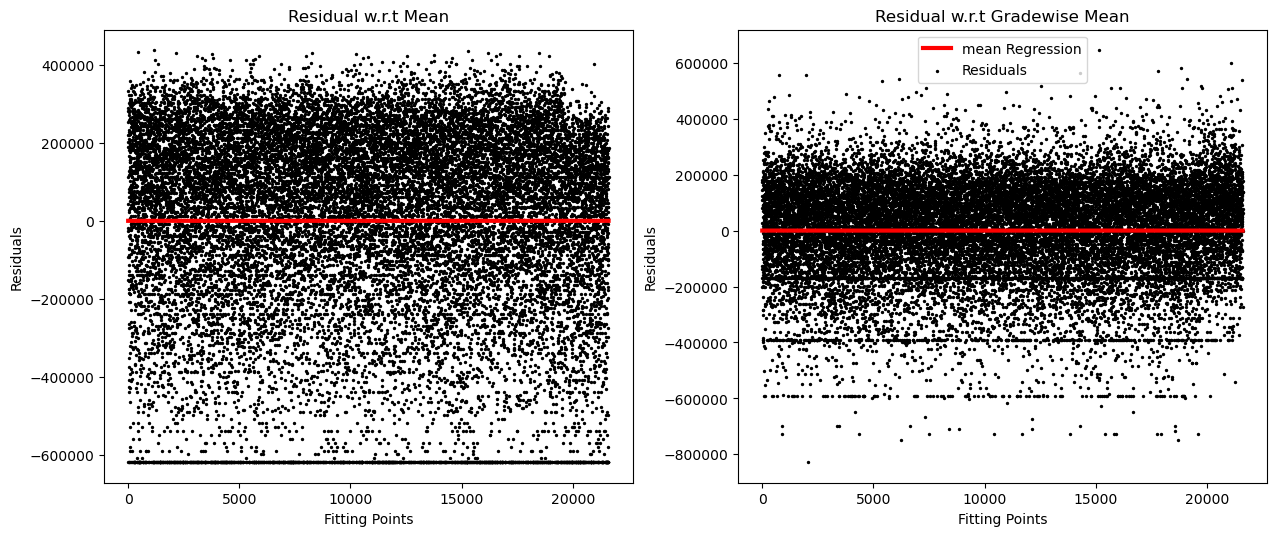

In [16]:
k = range(0, len(data))
l = [0 for i in range(len(data))]
plt.figure(dpi=100, figsize = (15,6))
plt.subplot(1,2,1)
plt.scatter(k, mean_difference, color= 'black', label = 'Residuals', s=2)
plt.plot(k, l, color= 'red', label = 'mean Regression', linewidth = 3)
plt.xlabel('Fitting Points')
plt.ylabel('Residuals')
plt.title('Residual w.r.t Mean')

plt.subplot(1,2,2)
plt.scatter(k, grade_mean_difference, color= 'black', label = 'Residuals', s=2)
plt.plot(k, l, color= 'red', label = 'mean Regression', linewidth = 3)
plt.xlabel('Fitting Points')
plt.ylabel('Residuals')
plt.title('Residual w.r.t Gradewise Mean')
plt.legend()

# Quantifiable Aporaoch To Predict Best Model

In [17]:
# Model with least errors is best
cost = sum(mean_difference)/len(data)
print(round(cost,7))

0.0


In [20]:
# Using MAE
Y = data['Sale_Price']
Y_hat1 = data['mean_sales'] # for first model
Y_hat2 = data['grade_mean'] # for second model
n = len(data)
len(Y), len(Y_hat1),len(Y_hat2), n 

(21609, 21609, 21609, 21609)

In [23]:
cost_mean = sum(abs(Y_hat1-Y))/n
cost_grade_mean = sum(abs(Y_hat2- Y))/n
cost_mean, cost_grade_mean

(199168.78146839526, 137081.70298203363)

In [27]:
from sklearn.metrics import mean_absolute_error
cost_mean = mean_absolute_error(Y_hat1,Y)
cost_grade_mean = mean_absolute_error(Y_hat2,Y)
cost_mean, cost_grade_mean

(199168.7814684109, 137081.7029820291)

In [29]:
# Using MSE
from sklearn.metrics import mean_squared_error
cost_mean = mean_squared_error(Y_hat1,Y)
cost_grade_mean = mean_squared_error(Y_hat2,Y)
cost_mean, cost_grade_mean

(62528116847.799576, 30804835720.342426)

In [30]:
# Using RMSE
from sklearn.metrics import mean_squared_error
cost_mean = mean_squared_error(Y_hat1,Y)**0.5
cost_grade_mean = mean_squared_error(Y_hat2,Y)**0.5
cost_mean, cost_grade_mean

(250056.2273725643, 175513.06424406826)

# r^2  

In [31]:
Y = data['Sale_Price']
Y_hat = data['grade_mean']
Y_bar = data['mean_sales']
n = len(data)
len(Y), len(Y_hat), len(Y_bar), n

(21609, 21609, 21609, 21609)

In [34]:
mse_mean = mean_squared_error(Y_bar, Y)
# Mse of second model
mse_model = mean_squared_error(Y_hat, Y)
mse_mean, mse_model

(62528116847.799576, 30804835720.342426)

In [35]:
R2 = 1- (mse_model/mse_mean)
R2

0.5073442592981836